In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [8]:
import yfinance as yf
import pandas as pd
msft = yf.Ticker("PVP.NS")

In [10]:
k=msft.history(period="3y")
dataf=pd.DataFrame(k)
dataf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-21 00:00:00+05:30,1.70,1.70,1.70,1.70,0,0.0,0.0
2020-09-22 00:00:00+05:30,1.70,1.70,1.70,1.70,0,0.0,0.0
2020-09-23 00:00:00+05:30,1.70,1.70,1.70,1.70,0,0.0,0.0
2020-09-24 00:00:00+05:30,1.70,1.70,1.70,1.70,0,0.0,0.0
2020-09-25 00:00:00+05:30,1.70,1.70,1.70,1.70,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-13 00:00:00+05:30,9.90,9.90,9.90,9.90,76039,0.0,0.0
2023-09-14 00:00:00+05:30,10.05,10.05,9.80,10.05,200635,0.0,0.0
2023-09-15 00:00:00+05:30,10.25,10.25,10.25,10.25,24728,0.0,0.0


In [11]:
dataf.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.998939,0.998212,0.997496,0.203495,NaN,NaN
High,0.998939,1.000000,0.997878,0.998230,0.207423,NaN,NaN
Low,0.998212,0.997878,1.000000,0.998577,0.191569,NaN,NaN
Close,0.997496,0.998230,0.998577,1.000000,0.204551,NaN,NaN
Volume,0.203495,0.207423,0.191569,0.204551,1.000000,NaN,NaN
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data=dataf.drop(columns=["Volume","Dividends","Stock Splits"])
data.corr()

,Open,High,Low,Close
Open,1.000000,0.998939,0.998212,0.997496
High,0.998939,1.000000,0.997878,0.998230
Low,0.998212,0.997878,1.000000,0.998577
Close,0.997496,0.998230,0.998577,1.000000


In [13]:
data

,Open,High,Low,Close
Date,,,,
2020-09-21 00:00:00+05:30,1.70,1.70,1.70,1.70
2020-09-22 00:00:00+05:30,1.70,1.70,1.70,1.70
2020-09-23 00:00:00+05:30,1.70,1.70,1.70,1.70
2020-09-24 00:00:00+05:30,1.70,1.70,1.70,1.70
2020-09-25 00:00:00+05:30,1.70,1.70,1.70,1.70
...,...,...,...,...
2023-09-13 00:00:00+05:30,9.90,9.90,9.90,9.90
2023-09-14 00:00:00+05:30,10.05,10.05,9.80,10.05
2023-09-15 00:00:00+05:30,10.25,10.25,10.25,10.25


In [14]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.67857142, 0.67322837, 0.68951611, 0.68951611],
       [0.71825396, 0.71259845, 0.72983869, 0.72983869],
       [0.7579365 , 0.75196853, 0.68951611, 0.77016127]])

In [15]:
n_steps = 10  # You can adjust this based on your dataset and prediction horizon
n_features = 4

# Prepare the data for LSTM training
X, y = [], []
for i in range(len(data_scaled) - n_steps):
    X.append(data_scaled[i:i + n_steps])
    y.append(data_scaled[i + n_steps])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]


In [16]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(units=4))  # 4 output nodes for Open, High, Low, Close
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/100
19/19 [==============================] - 3s 7ms/step - loss: 0.0692
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0111
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 8/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 9/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 10/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 11/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 12/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 13/100
19/19 [=================

In [18]:
predicted = model.predict(X_test)


predicted

5/5 [==============================] - 0s 5ms/step


array([[0.61696136, 0.60173357, 0.58829236, 0.61042285],
       [0.5425705 , 0.5330852 , 0.5168385 , 0.5476042 ],
       [0.51968944, 0.5049808 , 0.49628997, 0.52068424],
       [0.5498808 , 0.5339473 , 0.52176446, 0.54240805],
       [0.5347586 , 0.5240897 , 0.510765  , 0.5324083 ],
       [0.52481323, 0.51712716, 0.50144535, 0.5243521 ],
       [0.51232225, 0.5055043 , 0.48837024, 0.5119423 ],
       [0.46692264, 0.46193174, 0.4445449 , 0.4711048 ],
       [0.446041  , 0.43661952, 0.42338723, 0.4475776 ],
       [0.45224634, 0.44091523, 0.42722493, 0.44968468],
       [0.4439009 , 0.43310094, 0.4208591 , 0.44174457],
       [0.45217898, 0.44058552, 0.42971128, 0.4466887 ],
       [0.45551264, 0.446079  , 0.43448555, 0.45031226],
       [0.43221408, 0.42646158, 0.41340584, 0.43152   ],
       [0.4314624 , 0.42382473, 0.4118626 , 0.4289593 ],
       [0.44428414, 0.43471056, 0.42424577, 0.43854052],
       [0.43838307, 0.43070567, 0.42034376, 0.43439537],
       [0.44402418, 0.4367535 ,

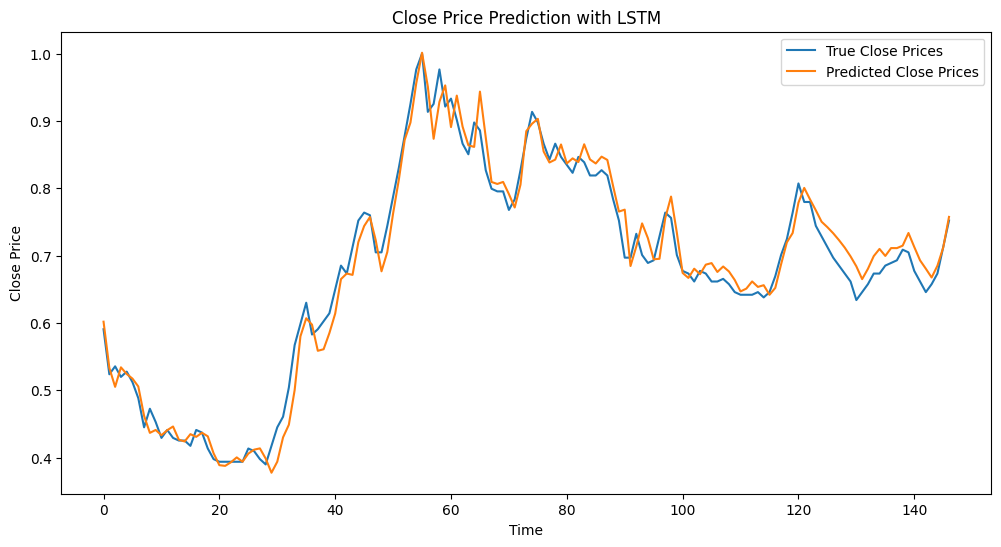

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 1], label='True Close Prices')
plt.plot(predicted[:, 1], label='Predicted Close Prices')
plt.legend()
plt.title('Close Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()